## Libraries Required

In [2]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


## Website URL

## Movies sorted by: Popularity.

In [2]:
url = """https://www.imdb.com/search/title/?genres=Action&explore=genres&title_type=feature&ref_=ft_movie_0"""
page = rq.get(url)
page

<Response [200]>

In [3]:
soup = BeautifulSoup(page.text)

In [4]:
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Top 50 Action Movies - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/search/title/?title_type=feature&amp;genres=action" rel="canonical"/>
<meta content="http://www.imdb.com/search/title/?title_type=feature&amp;genres=action"

In [5]:
column_element = soup.find_all("h3", class_= "lister-item-header")

## Obtaining columns

In [6]:
Title = []
for i in column_element:
    a = re.sub("[(\d+)\n\.]", "", i.text)
    Title.append(a)

In [9]:
Rating = []
r = soup.find_all("div", class_= "lister-item-content")

for i in r:
    a = i.find("div", class_="ratings-bar")
    if a in i:
        b = a.find("div").text
        c = re.sub("\n", "", b)
        Rating.append(float(c))
    else:
        Rating.append(np.nan)
        
print(Rating)




[7.3, 8.9, 6.6, 7.6, 7.1, 6.0, 8.4, 7.9, nan, 8.2, 7.5, 7.3, nan, 6.8, 4.5, 6.0, 6.9, 6.1, 7.9, 7.1, 6.0, nan, 8.4, 5.4, 8.0, nan, 7.0, nan, 8.2, 8.3, 7.1, 6.1, 8.2, 7.8, 5.4, 8.8, 7.8, nan, 9.0, 5.6, 5.2, 5.8, 7.5, 6.6, 6.5, 8.3, 7.3, 7.4, 5.2, 6.7]


In [10]:
Director = []
directors = soup("p", class_="")
for i in directors:
    a = i.find("a").text
    Director.append(a)
print(len(Director))

50


In [11]:
Lead_Role = []

stars = soup("p", class_="")
for i in stars:
    a = i.text
    b = re.sub("\n", "", a)
    star = re.findall(r"Stars:(\w+\s\w+)", b)
    if len(star) > 0:
        Lead_Role.append(star[0])
    
len(Lead_Role)

50

In [12]:
Duration = []

t = soup.find_all("p", class_="text-muted")
for i in t:
    a = i.find("span", class_="runtime")
    if a in i:
        b=re.sub("min", "", a.text)
        Duration.append(int(b))
    else:
        Duration.append(np.nan)
        
Duration = Duration[0::2]
Duration    
        

[144,
 140,
 127,
 192,
 122,
 141,
 117,
 169,
 154,
 150,
 123,
 134,
 nan,
 116,
 179,
 119,
 91,
 124,
 162,
 121,
 130,
 163,
 115,
 93,
 155,
 nan,
 144,
 nan,
 127,
 130,
 101,
 112,
 148,
 139,
 93,
 148,
 176,
 nan,
 152,
 115,
 154,
 116,
 118,
 119,
 98,
 170,
 127,
 101,
 143,
 114]

In [13]:
Demographic = []

for i in t:
    a = i.find("span", class_="certificate")
    if a in i:
        Demographic.append(a.text)
    else:
        Demographic.append(np.nan)
        
Demographic = Demographic[0::2]
Demographic
    

['UA',
 'U',
 'UA',
 'UA',
 'A',
 'UA',
 'U',
 'A',
 'PG-13',
 'UA',
 'R',
 'UA',
 nan,
 '18',
 'U',
 'R',
 'A',
 'UA',
 'UA',
 'A',
 'UA',
 nan,
 'A',
 'R',
 'UA',
 nan,
 'UA',
 nan,
 'UA',
 'UA',
 'PG',
 'R',
 'UA',
 'A',
 'UA',
 'UA',
 'UA',
 nan,
 'UA',
 'R',
 'UA',
 'U/A 16+',
 '(Banned)',
 'A',
 'A',
 'A',
 'A',
 'A',
 'UA',
 'UA']

In [14]:
Year = []
for i in column_element:
    a = re.findall(r"(\d+)", i.text)
    Year.append(int(a[-1]))
    
Year

[2023,
 2023,
 2023,
 2022,
 2023,
 2023,
 2018,
 2023,
 2023,
 2023,
 2023,
 2023,
 2023,
 2020,
 2023,
 2023,
 2022,
 2023,
 2009,
 2023,
 2023,
 2023,
 1981,
 2023,
 2021,
 2024,
 2007,
 2024,
 1993,
 2022,
 2023,
 2023,
 2021,
 2022,
 2023,
 2010,
 2022,
 2023,
 2008,
 2023,
 2017,
 2023,
 1984,
 2023,
 2023,
 1995,
 2022,
 2014,
 2021,
 2018]

In [15]:
Genre = []

genre = soup.find_all("span", class_ = "genre")
for i in genre:
    Genre.append(i.text.replace("\n", "").strip())
    
Genre

['Action, Adventure, Fantasy',
 'Animation, Action, Adventure',
 'Action, Adventure, Sci-Fi',
 'Action, Adventure, Fantasy',
 'Action, Thriller',
 'Action, Adventure, Crime',
 'Animation, Action, Adventure',
 'Action, Crime, Thriller',
 'Action, Adventure',
 'Action, Adventure, Comedy',
 'Action, Thriller, War',
 'Action, Adventure, Comedy',
 'Action, Adventure, Thriller',
 'Action, Thriller',
 'Action, Adventure, Drama',
 'Action, Thriller',
 'Action, War',
 'Action, Adventure, Comedy',
 'Action, Adventure, Fantasy',
 'Action, Drama, Thriller',
 'Action, Adventure, Comedy',
 'Action, Adventure, Thriller',
 'Action, Adventure',
 'Action, Mystery, Thriller',
 'Action, Adventure, Drama',
 'Animation, Action, Adventure',
 'Action, Adventure, Sci-Fi',
 'Action, Adventure, Drama',
 'Action, Adventure, Sci-Fi',
 'Action, Drama',
 'Animation, Action, Adventure',
 'Action, Comedy',
 'Action, Adventure, Fantasy',
 'Action, Adventure, Comedy',
 'Action, Adventure, Drama',
 'Action, Adventure, Sc

In [16]:
# Obtaining columns from the rest of the URLs.

Title1 = []
Rating1 = []
Director1 = []
Lead_Role1 = []
Year1 = []
Genre1 = []





for i in range(51, 352, 50):
    urls = "https://www.imdb.com/search/title/?title_type=feature&genres=action&start="+str(i)+"&explore=genres&ref_=adv_nxt"
    page = rq.get(urls)
    soup = BeautifulSoup(page.text)
    
    column_element = soup.find_all("h3", class_= "lister-item-header")
    for i in column_element:
        a = re.sub("[(\d+)\n\.]", "", i.text)
        Title1.append(a)
        
    r = soup.find_all("div", class_= "lister-item-content")

    for i in r:
        a = i.find("div", class_="ratings-bar")
        if a in i:
            b = a.find("div").text
            c = re.sub("\n", "", b)
            Rating1.append(float(c))
        else:
            Rating1.append(np.nan)
        
    directors = soup("p", class_="")
    for i in directors:
        a = i.find("a").text
        Director1.append(a)
        
    stars = soup.find_all("p", class_="")
    for i in stars:
        a = i.text
        b = re.sub("\n", "", a)
        star = re.findall(r"Stars:(\w+\s\w+)", b)
        if len(star) > 0 and star[0] != "":
            Lead_Role1.append(star[0])
        else:
            Lead_Role1.append(np.nan)
            
            
    for i in column_element:
        a = re.findall(r"(\d+)", i.text)
        Year1.append(int(a[-1]))
    
    genre = soup.find_all("span", class_ = "genre")
    for i in genre:
        Genre1.append(i.text.replace("\n", "").strip())

In [17]:
Duration1 = []
for i in range(51, 352, 50):
    urls = "https://www.imdb.com/search/title/?title_type=feature&genres=action&start="+str(i)+"&explore=genres&ref_=adv_nxt"
    page = rq.get(urls)
    soup = BeautifulSoup(page.text)
    t = soup.find_all("p", class_="text-muted")

    for n in t:
        a=n.find("span", class_="runtime")
        if a in n:
            Duration1.append(a.text)
        else:
            Duration1.append(np.nan)
            
print(len(Duration1[0::2]))
Duration1 = Duration1[0::2]
Duration1
        
    
    

350


['127 min',
 '114 min',
 '121 min',
 '181 min',
 '107 min',
 '126 min',
 '165 min',
 '137 min',
 '106 min',
 '155 min',
 '137 min',
 '130 min',
 '107 min',
 '132 min',
 '90 min',
 '178 min',
 '106 min',
 '164 min',
 '121 min',
 nan,
 '122 min',
 '143 min',
 '109 min',
 '154 min',
 nan,
 '129 min',
 '141 min',
 '109 min',
 '118 min',
 '135 min',
 '142 min',
 '161 min',
 '110 min',
 '133 min',
 '106 min',
 '242 min',
 '84 min',
 '132 min',
 '130 min',
 '120 min',
 '140 min',
 '149 min',
 '152 min',
 '107 min',
 '112 min',
 '147 min',
 '129 min',
 '136 min',
 '90 min',
 '122 min',
 nan,
 '122 min',
 '113 min',
 '136 min',
 '107 min',
 '137 min',
 '163 min',
 nan,
 nan,
 '132 min',
 '135 min',
 '113 min',
 '104 min',
 '124 min',
 '124 min',
 '143 min',
 nan,
 '150 min',
 '117 min',
 '133 min',
 nan,
 '148 min',
 '125 min',
 '101 min',
 '121 min',
 '137 min',
 '130 min',
 '164 min',
 '110 min',
 '201 min',
 '122 min',
 '119 min',
 '149 min',
 '130 min',
 '107 min',
 '137 min',
 '123 min',
 

In [18]:
Demographic1 = []
for i in range(51, 352, 50):
    urls = "https://www.imdb.com/search/title/?title_type=feature&genres=action&start="+str(i)+"&explore=genres&ref_=adv_nxt"
    page = rq.get(urls)
    soup = BeautifulSoup(page.text)
    
    d = soup.find_all("p", class_="text-muted")
    for i in d:
        a=i.find("span", "certificate")
        if a in i:
            Demographic1.append(a.text)
        else:
            Demographic1.append(np.nan)
        
Demographic1 = Demographic1[0::2]
Demographic1

['U',
 'A',
 'UA',
 'UA',
 'A',
 'U',
 'UA',
 'A',
 'A',
 'UA',
 'U',
 'UA',
 'A',
 'UA',
 'PG',
 'U',
 'A',
 'UA',
 'U',
 nan,
 'U',
 'UA',
 'UA',
 'UA',
 nan,
 'A',
 'A',
 'U',
 'UA',
 'PG-13',
 'UA',
 'UA',
 'A',
 'U',
 'UA 7+',
 '18',
 'R',
 'A',
 'A',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'A',
 'UA',
 'A',
 'A',
 'A',
 'R',
 nan,
 'A',
 'A',
 'UA',
 'UA',
 'A',
 'UA',
 'R',
 'PG-13',
 'UA',
 'UA',
 'UA',
 'UA',
 'A',
 'A',
 'UA',
 nan,
 'UA',
 'UA',
 'UA',
 nan,
 'A',
 'UA',
 'A',
 'A',
 'U',
 'UA',
 'UA',
 'A',
 'U',
 'UA 16+',
 'R',
 'UA',
 'UA',
 'A',
 'R',
 'UA',
 'UA',
 'U',
 'R',
 'UA 13+',
 'PG-13',
 'R',
 'R',
 nan,
 'A',
 'U',
 nan,
 'A',
 'UA',
 'U/A',
 'PG-13',
 'U',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'A',
 'A',
 nan,
 'UA',
 nan,
 'UA',
 'UA',
 'R',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 nan,
 'A',
 'U',
 'UA',
 'UA',
 'U',
 'A',
 'UA',
 'U',
 'A',
 'UA',
 'UA',
 'UA',
 '16',
 'UA',
 'UA',
 'UA',
 'A',
 'A',
 '13',
 'UA',
 'UA 13+',
 'A',
 'R',
 'UA',
 'A',
 

In [20]:
# Appending first page columns to the rest of the URLs.

Title_f = Title + Title1
Rating_f = Rating + Rating1
Director_f = Director + Director1
Lead_Role_f = Lead_Role + Lead_Role1
Duration_f = Duration + Duration1
Demographic_f = Demographic + Demographic1
Year_f = Year + Year1
Genre_f = Genre + Genre1

In [180]:
# Dropping 'Action' as all movies are sorted by action genre.

Genre = []
for i in df_final['Genre']:
    Genre.append(re.sub("Action, ", "", i))
    
df_final['Genre'] = np.array(Genre)

In [26]:
# Checking if length of each column's match before creating the DataFrame.

print(len(Title_f))
print(len(Director_f))
print(len(Lead_Role_f))
print(len(Genre_f))
print(len(Year_f))
print(len(Duration_f))
print(len(Demographic_f))
print(len(Rating_f))

400
400
400
400
400
400
400
400


In [23]:
d = {
    "Title": Title_f,
    "Director": Director_f,
    "Lead_Role": Lead_Role_f,
    "Genre": Genre_f,
    "Year": Year_f,
    "Duration": Duration_f,
    "Demographic": Demographic_f,
    "Rating": Rating_f,
}

## Creating Initial DataFrame

In [24]:
df = pd.DataFrame(d)
df

,Title,Director,Lead_Role,Genre,Year,Duration,Demographic,Rating
0,The Flash,Andy Muschietti,Ezra Miller,"Action, Adventure, Fantasy",2023,144,UA,7.3
1,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,Shameik Moore,"Animation, Action, Adventure",2023,140,U,8.9
2,Transformers: Rise of the Beasts,Steven Caple Jr.,Anthony Ramos,"Action, Adventure, Sci-Fi",2023,127,UA,6.6
3,Avatar: The Way of Water,James Cameron,Sam Worthington,"Action, Adventure, Fantasy",2022,192,UA,7.6
4,Extraction II,Sam Hargrave,Chris Hemsworth,"Action, Thriller",2023,122,A,7.1
...,...,...,...,...,...,...,...,...
395,X: First Class,Matthew Vaughn,James McAvoy,"Action, Sci-Fi",2011,131 min,UA,7.7
396,The Rock,Michael Bay,Sean Connery,"Action, Adventure, Thriller",1996,136 min,A,7.4
397,Mulan,Niki Caro,Liu Yifei,"Action, Adventure, Drama",2020,115 min,12+,5.8
398,"Lock, Stock and Two Smoking Barrels",Guy Ritchie,Jason Flemyng,"Action, Comedy, Crime",1998,107 min,A,8.1


In [27]:
df.to_csv("result_IMDb.csv")

In [102]:
df = pd.read_csv('result_IMDb.csv')
df

,Unnamed: 0,Title,Director,Lead_Role,Genre,Year,Duration,Demographic,Rating
0,0,The Flash,Andy Muschietti,Ezra Miller,"Action, Adventure, Fantasy",2023,144,UA,7.3
1,1,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,Shameik Moore,"Animation, Action, Adventure",2023,140,U,8.9
2,2,Transformers: Rise of the Beasts,Steven Caple Jr.,Anthony Ramos,"Action, Adventure, Sci-Fi",2023,127,UA,6.6
3,3,Avatar: The Way of Water,James Cameron,Sam Worthington,"Action, Adventure, Fantasy",2022,192,UA,7.6
4,4,Extraction II,Sam Hargrave,Chris Hemsworth,"Action, Thriller",2023,122,A,7.1
...,...,...,...,...,...,...,...,...,...
395,395,X: First Class,Matthew Vaughn,James McAvoy,"Action, Sci-Fi",2011,131 min,UA,7.7
396,396,The Rock,Michael Bay,Sean Connery,"Action, Adventure, Thriller",1996,136 min,A,7.4
397,397,Mulan,Niki Caro,Liu Yifei,"Action, Adventure, Drama",2020,115 min,12+,5.8
398,398,"Lock, Stock and Two Smoking Barrels",Guy Ritchie,Jason Flemyng,"Action, Comedy, Crime",1998,107 min,A,8.1


## Data cleaning

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   400 non-null    int64  
 1   Title        396 non-null    object 
 2   Director     400 non-null    object 
 3   Lead_Role    396 non-null    object 
 4   Genre        400 non-null    object 
 5   Year         400 non-null    int64  
 6   Duration     369 non-null    object 
 7   Demographic  362 non-null    object 
 8   Rating       365 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 28.3+ KB


In [68]:
# Removing 'min' from the Duration column.
list_d = list(df['Duration'][50:])


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class '

In [73]:
list_f = []
for i in list_d:
    if i is not float:
        list_f.append(str(i).replace("min", ""))
        
        

350

In [82]:
list_f1 = list(df['Duration'][0:50])

In [83]:
list_f2 = list_f1 + list_f

In [86]:
a=np.array(list_f2)
a

array(['144', '140', '127', '192', '122', '141', '117', '169', '154',
       '150', '123', '134', 'nan', '116', '179', '119', '91', '124',
       '162', '121', '130', '163', '115', '93', '155', 'nan', '144',
       'nan', '127', '130', '101', '112', '148', '139', '93', '148',
       '176', 'nan', '152', '115', '154', '116', '118', '119', '98',
       '170', '127', '101', '143', '114', '127 ', '114 ', '121 ', '181 ',
       '107 ', '126 ', '165 ', '137 ', '106 ', '155 ', '137 ', '130 ',
       '107 ', '132 ', '90 ', '178 ', '106 ', '164 ', '121 ', 'nan',
       '122 ', '143 ', '109 ', '154 ', 'nan', '129 ', '141 ', '109 ',
       '118 ', '135 ', '142 ', '161 ', '110 ', '133 ', '106 ', '242 ',
       '84 ', '132 ', '130 ', '120 ', '140 ', '149 ', '152 ', '107 ',
       '112 ', '147 ', '129 ', '136 ', '90 ', '122 ', 'nan', '122 ',
       '113 ', '136 ', '107 ', '137 ', '163 ', 'nan', 'nan', '132 ',
       '135 ', '113 ', '104 ', '124 ', '124 ', '143 ', 'nan', '150 ',
       '117 ', '133 '

In [142]:
df['Duration'] = a

In [143]:
df['Duration']

0       144
1       140
2       127
3       192
4       122
       ... 
395    131 
396    136 
397    115 
398    107 
399    106 
Name: Duration, Length: 400, dtype: object

### Type conversion

In [147]:
df['Duration'] = df['Duration'].astype("float")

In [128]:
df['Title'] = df['Title'].astype('str')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        400 non-null    object 
 1   Director     400 non-null    object 
 2   Lead_Role    396 non-null    object 
 3   Genre        400 non-null    object 
 4   Year         400 non-null    int64  
 5   Duration     369 non-null    object 
 6   Demographic  362 non-null    object 
 7   Rating       365 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 25.1+ KB


In [130]:
df

,Title,Director,Lead_Role,Genre,Year,Duration,Demographic,Rating
0,The Flash,Andy Muschietti,Ezra Miller,"Action, Adventure, Fantasy",2023,144,UA,7.3
1,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,Shameik Moore,"Animation, Action, Adventure",2023,140,U,8.9
2,Transformers: Rise of the Beasts,Steven Caple Jr.,Anthony Ramos,"Action, Adventure, Sci-Fi",2023,127,UA,6.6
3,Avatar: The Way of Water,James Cameron,Sam Worthington,"Action, Adventure, Fantasy",2022,192,UA,7.6
4,Extraction II,Sam Hargrave,Chris Hemsworth,"Action, Thriller",2023,122,A,7.1
...,...,...,...,...,...,...,...,...
395,X: First Class,Matthew Vaughn,James McAvoy,"Action, Sci-Fi",2011,131 min,UA,7.7
396,The Rock,Michael Bay,Sean Connery,"Action, Adventure, Thriller",1996,136 min,A,7.4
397,Mulan,Niki Caro,Liu Yifei,"Action, Adventure, Drama",2020,115 min,12+,5.8
398,"Lock, Stock and Two Smoking Barrels",Guy Ritchie,Jason Flemyng,"Action, Comedy, Crime",1998,107 min,A,8.1


### Missing values

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        400 non-null    object 
 1   Director     400 non-null    object 
 2   Lead_Role    400 non-null    object 
 3   Genre        400 non-null    object 
 4   Year         400 non-null    int64  
 5   Duration     369 non-null    float64
 6   Demographic  362 non-null    object 
 7   Rating       365 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 25.1+ KB


In [135]:
df['Lead_Role'].fillna(value = df['Lead_Role'].mode()[0], inplace= True)

In [150]:
df['Duration'].fillna(df['Duration'].mean(), inplace=True)

In [152]:
df['Demographic'].fillna(value=df['Demographic'].mode()[0], inplace=True)

In [153]:
df['Rating'].fillna(value=df['Rating'].mean(), inplace=True)

In [155]:
df_final = df

## Cleaned Data CSV

In [162]:
df_final.to_csv("result_final.csv")

## Visualization

## Univariate Plots

In [3]:
df_final = pd.read_csv("result_final.csv")

In [158]:
df_final['Genre'].unique()

array(['Action, Adventure, Fantasy', 'Animation, Action, Adventure',
       'Action, Adventure, Sci-Fi', 'Action, Thriller',
       'Action, Adventure, Crime', 'Action, Crime, Thriller',
       'Action, Adventure', 'Action, Adventure, Comedy',
       'Action, Thriller, War', 'Action, Adventure, Thriller',
       'Action, Adventure, Drama', 'Action, War',
       'Action, Drama, Thriller', 'Action, Mystery, Thriller',
       'Action, Drama', 'Action, Comedy', 'Action, Crime, Drama',
       'Action, Drama, War', 'Action, Comedy, Thriller', 'Action, Sci-Fi',
       'Action, Comedy, Crime', 'Action, Adventure, Horror',
       'Action, Drama, Mystery', 'Action, Sci-Fi, Thriller',
       'Action, Biography, Drama', 'Action, Horror, Thriller',
       'Action, Fantasy, Horror', 'Action, Drama, History',
       'Action, Horror, Sci-Fi', 'Action, Drama, Sci-Fi',
       'Action, Drama, Sport', 'Action, Comedy, Mystery',
       'Action, Comedy, Fantasy', 'Action, Comedy, Sci-Fi',
       'Action, Cr

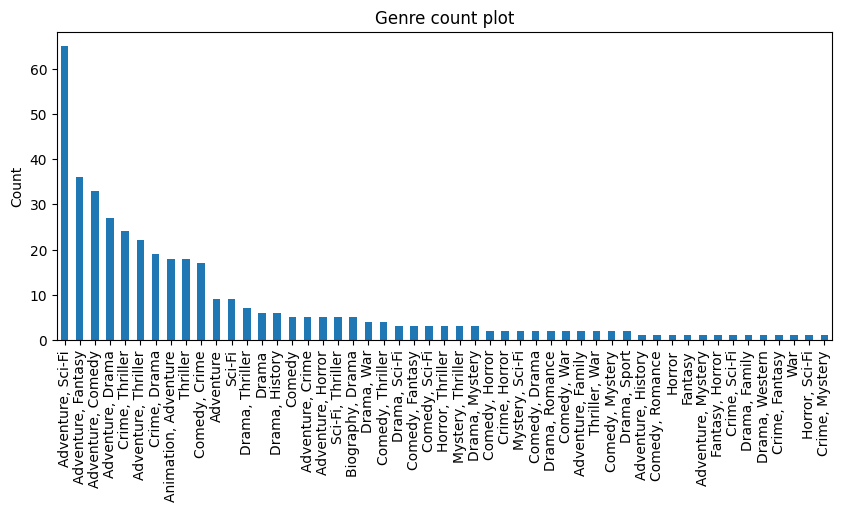

In [210]:
df_final['Genre'].value_counts().plot(kind="bar")
plt.title('Genre count plot')
plt.ylabel("Count")
plt.gcf().set_size_inches(10, 4)
plt.show()


In [8]:
df_final[df_final['Genre']=="Action, Adventure, Sci-Fi"].head().drop("Unnamed: 0", axis = 1)


,Title,Director,Lead_Role,Genre,Year,Duration,Demographic,Rating
2,Transformers: Rise of the Beasts,Steven Caple Jr.,Anthony Ramos,"Action, Adventure, Sci-Fi",2023,127.0,UA,6.6
26,Transformers,Michael Bay,Shia LaBeouf,"Action, Adventure, Sci-Fi",2007,144.0,UA,7.0
28,Jurassic Park,Steven Spielberg,Sam Neill,"Action, Adventure, Sci-Fi",1993,127.0,UA,8.2
35,Inception,Christopher Nolan,Leonardo DiCaprio,"Action, Adventure, Sci-Fi",2010,148.0,UA,8.8
40,Transformers: The Last Knight,Michael Bay,Mark Wahlberg,"Action, Adventure, Sci-Fi",2017,154.0,UA,5.2


Text(0.5, 1.0, 'Count of movies released b/w 1990 and 2023')

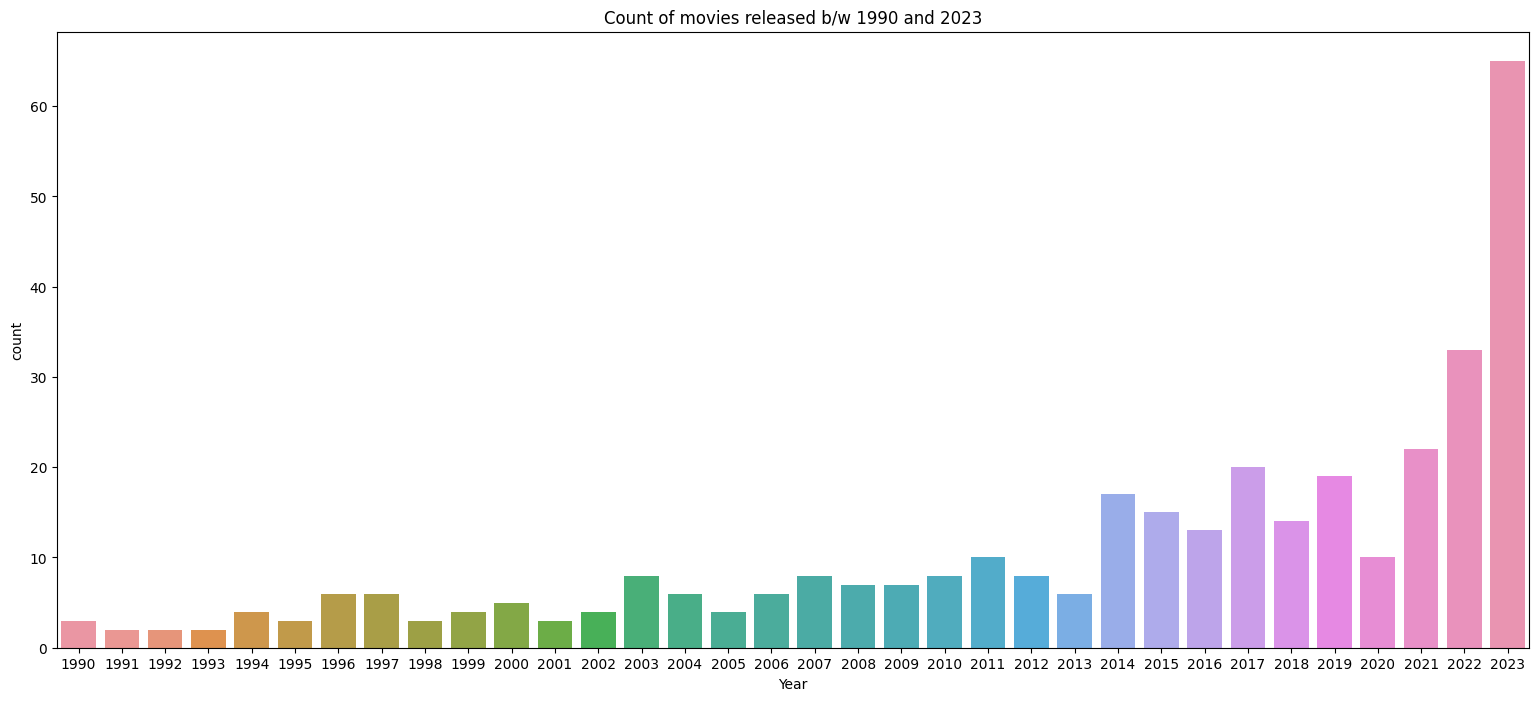

In [161]:
years = df_final[(df_final['Year'] >= 1990) & (df_final['Year'] <= 2023)]
sns.countplot(x='Year', data=years)
plt.gcf().set_size_inches(19,8)
plt.title("Count of movies released b/w 1990 and 2023")

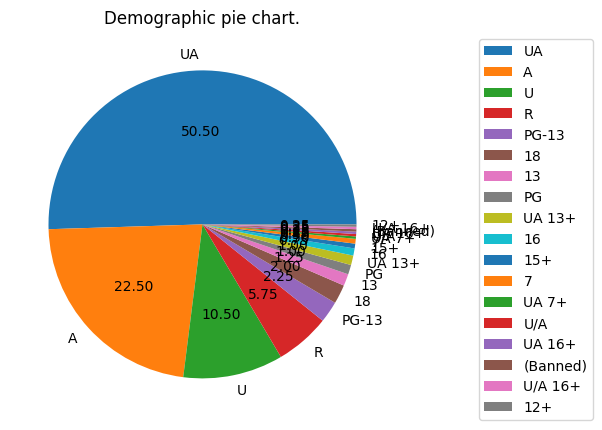

In [204]:
my_l = ['UA', 'A', 'U', 'R', 'PG-13','18', '13', 'PG', 'UA 13+', '16', '15+','7', 'UA 7+', 'U/A', 'UA 16+', '(Banned)', 'U/A 16+', '12+']

plt.pie(df_final["Demographic"].value_counts(), autopct = "%0.2f", labels=my_l)
plt.legend(bbox_to_anchor=(1.2, 1))
plt.title('Demographic pie chart.')
plt.gcf().set_size_inches(40,5)

Text(0.5, 1.0, 'Rating Histogram')

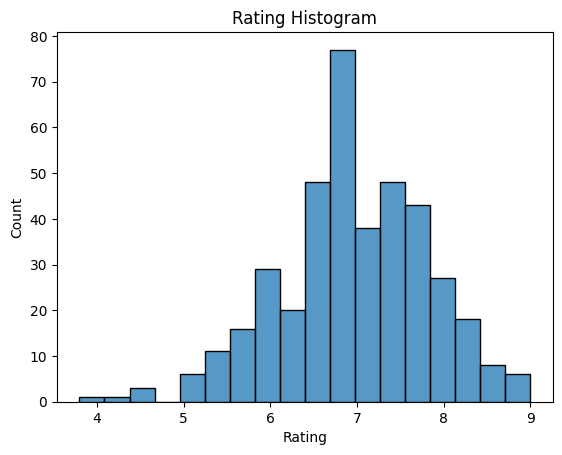

In [7]:
sns.histplot(df_final['Rating'])
plt.title("Rating Histogram")

Text(0.5, 1.0, 'Duration histogram')

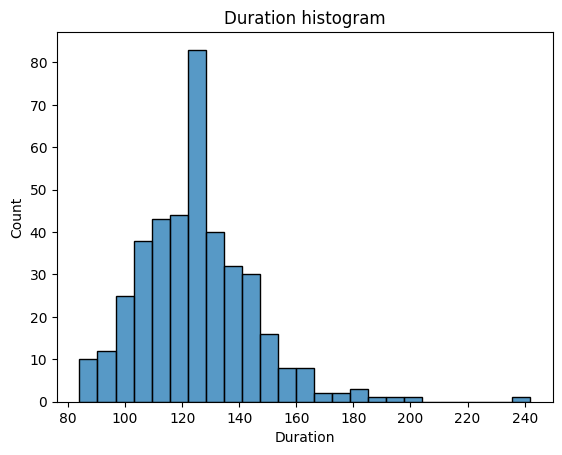

In [172]:
sns.histplot(df_final['Duration'])
plt.title("Duration histogram")

## Bivariate Plots

In [61]:
top10 = df_final.sort_values(by='Rating', ascending=False)

Text(0.5, 0, 'Rating')

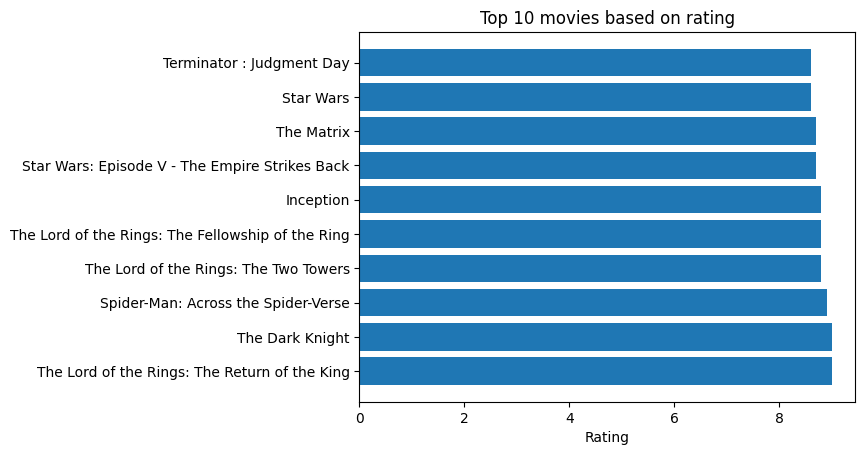

In [195]:
plt.barh(top10['Title'].head(10), top10['Rating'].head(10))
plt.title("Top 10 movies based on rating")
plt.xlabel("Rating")

In [98]:
bottom10 = df_final.sort_values(by='Rating').head(10)

Text(0, 0.5, 'Title')

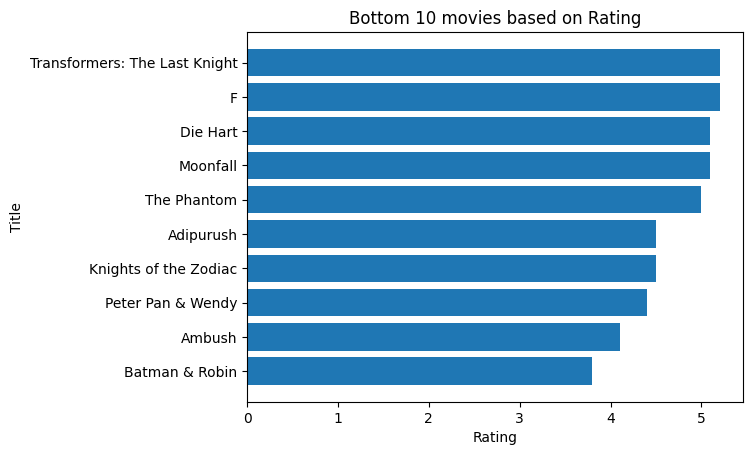

In [207]:
plt.barh(bottom10['Title'].head(10), bottom10['Rating'].head(10))
plt.title("Bottom 10 movies based on Rating")
plt.xlabel("Rating")
plt.ylabel("Title")

Text(0, 0.5, 'Directors')

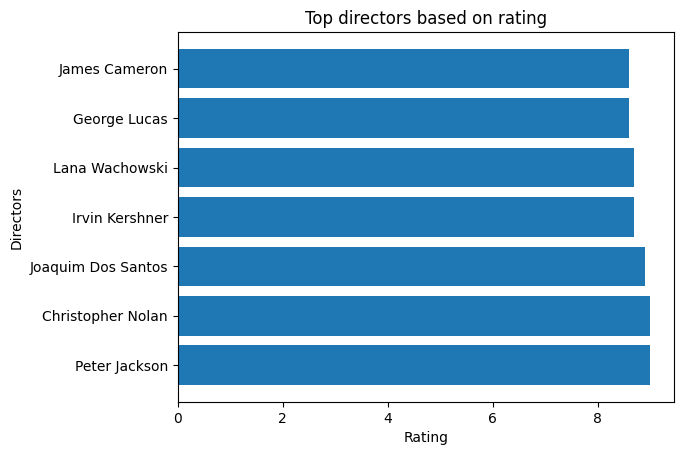

In [206]:
plt.barh(top10['Director'].head(10), top10['Rating'].head(10))
plt.title("Top directors based on rating")
plt.xlabel("Rating")
plt.ylabel("Directors")

Text(0, 0.5, 'Lead Role')

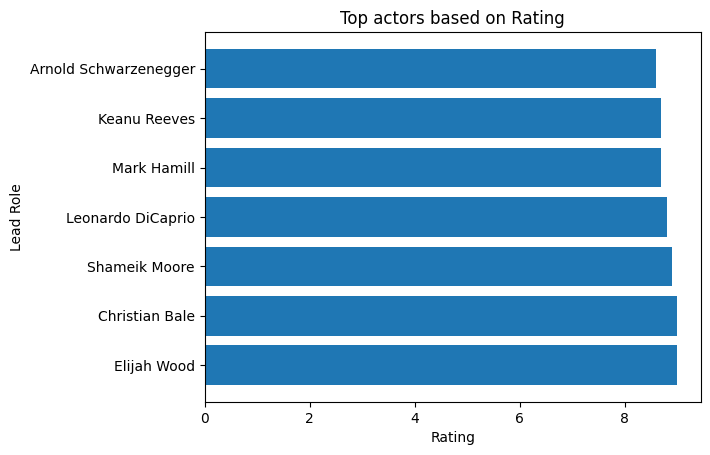

In [205]:
plt.barh(top10['Lead_Role'].head(10), top10['Rating'].head(10))
plt.title("Top actors based on Rating")
plt.xlabel("Rating")
plt.ylabel("Lead Role")

In [125]:
df_final[["Duration", "Rating"]].corr()

,Duration,Rating
Duration,1.000000,0.318746
Rating,0.318746,1.000000


In [173]:
df_final[["Year", "Rating"]].corr()

,Year,Rating
Year,1.000000,-0.208585
Rating,-0.208585,1.000000


## Multivariate Plot

<Axes: >

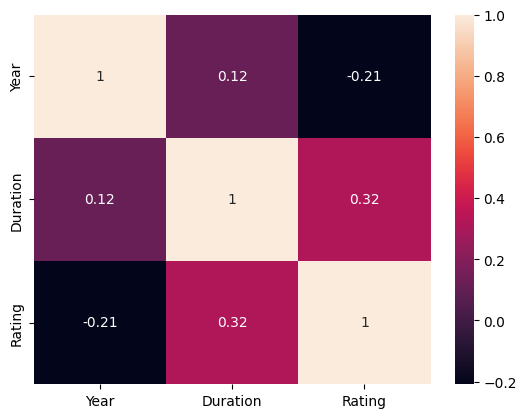

In [201]:
conti = df_final[['Year', 'Duration', 'Rating']].corr()
sns.heatmap(conti, annot=True)

In [211]:
df_final

,Title,Director,Lead_Role,Genre,Year,Duration,Demographic,Rating
0,The Flash,Andy Muschietti,Ezra Miller,"Adventure, Fantasy",2023,144.0,UA,7.3
1,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,Shameik Moore,"Animation, Adventure",2023,140.0,U,8.9
2,Transformers: Rise of the Beasts,Steven Caple Jr.,Anthony Ramos,"Adventure, Sci-Fi",2023,127.0,UA,6.6
3,Avatar: The Way of Water,James Cameron,Sam Worthington,"Adventure, Fantasy",2022,192.0,UA,7.6
4,Extraction II,Sam Hargrave,Chris Hemsworth,Thriller,2023,122.0,A,7.1
...,...,...,...,...,...,...,...,...
395,X: First Class,Matthew Vaughn,James McAvoy,Sci-Fi,2011,131.0,UA,7.7
396,The Rock,Michael Bay,Sean Connery,"Adventure, Thriller",1996,136.0,A,7.4
397,Mulan,Niki Caro,Liu Yifei,"Adventure, Drama",2020,115.0,12+,5.8
398,"Lock, Stock and Two Smoking Barrels",Guy Ritchie,Jason Flemyng,"Comedy, Crime",1998,107.0,A,8.1
